# A 1 is coded as being extremely reasonable here!!!

For a number of questions there were words that were repeated and you were asked to give these the same score. You did not give the same score for a number of these identical words which suggests you were not focusing on the task and makes your survey results unusable.

In [1]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

In [2]:
file_name_base = 'prob_slice_replaceable_comparisons'
mturk_version = 'MTURK_FIRST_'
full_base = mturk_version+file_name_base

In [3]:
answer_orders = pickle.load(open(full_base + '_answers_list.pickle','rb'))

In [4]:
mturk = pd.read_csv('Tail+Free+Sampling+Survey_October+17%2C+2019_07.33.zip')#'Tail+Free+Sampling+Survey_October+16%2C+2019_07.21.zip')

In [5]:
mturk.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q20,Random ID,Q22 - Parent Topics,Q22 - Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",". Just count the stars, right? * He eased __...",Thank you very much for completing this survey...,Random ID,Q22 - Parent Topics,Q22 - Topics
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID21_2""}","{""ImportId"":""QID21_3""}","{""ImportId"":""QID21_4""}","{""ImportId"":""QID21_5""}","{""ImportId"":""QID21_6""}","{""ImportId"":""QID21_7""}","{""ImportId"":""QID26_TEXT""}","{""ImportId"":""Random ID""}","{""ImportId"":""QID26_TEXT_c25db21136a8433bb1f4d1...","{""ImportId"":""QID26_TEXT_c25db21136a8433bb1f4d1..."
2,2019-10-15 21:35:00,2019-10-15 21:35:13,1,NaN,100,13,1,2019-10-15 21:35:14,R_2X6WbTrQRtVcuAK,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40022,NaN,NaN
3,2019-10-15 22:03:30,2019-10-15 22:08:53,0,107.145.113.42,100,322,1,2019-10-15 22:08:54,R_1KiQLFb92Exgwjx,NaN,...,1,2,5,4,1,1,NaN,99887,NaN,NaN
4,2019-10-15 22:18:07,2019-10-15 22:32:26,0,171.49.170.27,100,858,1,2019-10-15 22:32:26,R_3JjTvGYtgJEC5hD,NaN,...,3,3,2,4,5,2,i like to do this type of work in future,52503,NaN,Unknown


In [6]:
mturk.shape

(23, 126)

In [7]:
qstart = 'Q5_1'
qend = 'Q19_7'

In [8]:
reverse_encoding_dict = {k:v for k, v in zip(np.arange(1,6,1), np.arange(5,0,-1))}
reverse_encoding_dict

{1: 5, 2: 4, 3: 3, 4: 2, 5: 1}

In [9]:
mturk.drop([0,1,2], axis=0, inplace=True)# dropping the first null response and the header details

In [10]:
mturk.reset_index(inplace=True)

In [11]:
mturk.loc[:, qstart:qend] = mturk.loc[:, qstart:qend].apply(lambda x: x.astype(int).map(reverse_encoding_dict))

In [12]:
mturk.head()

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q20,Random ID,Q22 - Parent Topics,Q22 - Topics
0,3,2019-10-15 22:03:30,2019-10-15 22:08:53,0,107.145.113.42,100,322,1,2019-10-15 22:08:54,R_1KiQLFb92Exgwjx,...,5,4,1,2,5,5,NaN,99887,NaN,NaN
1,4,2019-10-15 22:18:07,2019-10-15 22:32:26,0,171.49.170.27,100,858,1,2019-10-15 22:32:26,R_3JjTvGYtgJEC5hD,...,3,3,4,2,1,4,i like to do this type of work in future,52503,NaN,Unknown
2,5,2019-10-15 22:48:54,2019-10-15 23:00:41,0,75.142.251.193,100,707,1,2019-10-15 23:00:42,R_2cuydCFibv8JRva,...,5,5,3,5,5,5,Thank you,56916,NaN,Unknown
3,6,2019-10-15 22:51:26,2019-10-15 23:01:15,0,157.46.79.62,100,588,1,2019-10-15 23:01:15,R_3PzZBVyiobpkdjr,...,1,2,4,5,3,3,A22CN9X0JP1HM4,92914,NaN,Unknown
4,7,2019-10-15 22:59:44,2019-10-15 23:19:12,0,49.207.137.2,100,1167,1,2019-10-15 23:19:12,R_2Pcjs6Du7ICHJ0G,...,4,3,2,5,3,1,NICE,64874,NaN,Unknown


In [13]:
mturk.shape

(20, 127)

In [14]:
np.asarray(mturk.columns.tolist())

array(['index', 'StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q5_1', 'Q5_2', 'Q5_3',
       'Q5_4', 'Q5_5', 'Q5_6', 'Q5_7', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4',
       'Q6_5', 'Q6_6', 'Q6_7', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5',
       'Q7_6', 'Q7_7', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6',
       'Q8_7', 'Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7',
       'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7',
       'Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q11_7',
       'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7',
       'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7',
       'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7',
       'Q1

In [15]:
mturk['Duration (in seconds)']= mturk['Duration (in seconds)'].astype(int)/60

In [16]:
qas = mturk.loc[:, qstart:qend]
qas;

In [17]:
answer_orders = answer_orders[0:15]

In [18]:
len(answer_orders)

15

In [19]:
to_df = []

for user_ind in range(qas.shape[0]):
    user_ans = qas.loc[user_ind, :]
    
    for answer_ind, quest in enumerate(answer_orders): 
        
        for q_ind, q in enumerate(quest): 
            abs_ind = answer_ind*len(quest)+q_ind
            #print(abs_ind)
            to_df.append([user_ind, answer_ind, q[0].strip(), q[1], user_ans[abs_ind] ])
res = pd.DataFrame(to_df, columns=['user_ind', 'q_ind', 'word', 'prob', 'score'])

In [20]:
res.head()

,user_ind,q_ind,word,prob,score
0,0,0,event,2.130662e-03,3
1,0,0,things,7.781028e-04,4
2,0,0,bad,4.916115e-04,1
3,0,0,events,4.103564e-07,5
4,0,0,circumstances,5.090322e-04,5


In [21]:
from importlib import reload
import utils

reload(utils)
from utils import *

In [22]:
res['score'] = res['score'].astype(int)

In [23]:
res['score'] = res['score']*2

# Looking at the global results without any cleaning

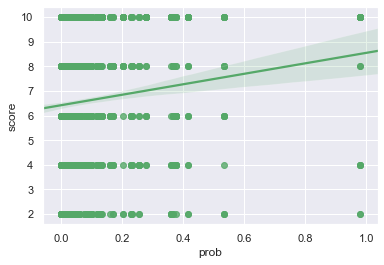

In [24]:
# put a linear regression through this. 

import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=res['prob'], y=res['score'], color="g")


Text(0, 0.5, 'Score')

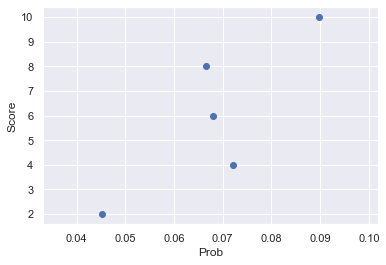

In [25]:
means = res.groupby('score').mean()
plt.scatter(means['prob'], means.index)
plt.xlabel('Prob')
plt.ylabel('Score')

In [26]:
mturk[['LocationLatitude',
 'LocationLongitude', 'Q20', 'Random ID', 'Duration (in seconds)']]

,LocationLatitude,LocationLongitude,Q20,Random ID,Duration (in seconds)
0,28.206207275390625,-80.68740081787109375,NaN,99887,5.366667
1,13.087799072265625,80.27850341796875,i like to do this type of work in future,52503,14.300000
2,39.5272064208984375,-119.91290283203125,Thank you,56916,11.783333
3,13.087799072265625,80.27850341796875,A22CN9X0JP1HM4,92914,9.800000
4,13.087799072265625,80.27850341796875,NICE,64874,19.450000
5,29.691802978515625,-95.6526031494140625,No comments,79189,6.000000
6,37.675201416015625,-120.946502685546875,no,96192,16.800000
7,13.087799072265625,80.27850341796875,A3PWNN3ITRK4X3,75978,7.316667
8,13.087799072265625,80.27850341796875,A3HZEWILX5PQSJ,26893,16.050000
9,13.087799072265625,80.27850341796875,IT IS INFORMATIVE,18522,27.416667


# What surveyors should I pay?

## What is the correlation matrix between them? 

In [27]:
user_vectors = []
for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]['score'].astype(int)
    # normalize to the unit vector
    #print(np.dot(single_u,single_u))
    single_u = single_u/ np.sqrt(np.dot(single_u,single_u))
    #print(np.sqrt(np.dot(single_u,single_u)))
    user_vectors.append(single_u)
user_vectors = np.asarray(user_vectors) # each user is a row

In [28]:
u_corr = np.corrcoef(user_vectors)
u_corr;

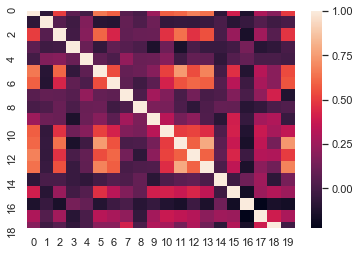

In [29]:
sns.heatmap(u_corr)

2, 5 and 6 all correlate well. This is the same as those that have high internal consistency (and also happen to give the highest scores). 6 is from Sacramento. 5 is from Houston. 2 is outside of Sacramento. 0 is from palm bay florida. and was almost internally consistent enough. correlated well with some of the others. 

## Looking at the scores from each one: 

In [30]:
'''for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]
    print('user ind:', user_ind)
    #overall output
    plt.scatter(single_u['prob'], single_u['score'])
    plt.xlabel('Prob')
    plt.ylabel('Score')
    plt.show()
    #mean output
    means = single_u.groupby('score').mean()
    plt.scatter(means['prob'], means.index)
    plt.xlabel('Prob')
    plt.ylabel('Score')
    plt.show()
    #did they get the same words with the same score? 
'''

"for user_ind in res['user_ind'].unique().tolist():\n    single_u = res[res['user_ind']==user_ind]\n    print('user ind:', user_ind)\n    #overall output\n    plt.scatter(single_u['prob'], single_u['score'])\n    plt.xlabel('Prob')\n    plt.ylabel('Score')\n    plt.show()\n    #mean output\n    means = single_u.groupby('score').mean()\n    plt.scatter(means['prob'], means.index)\n    plt.xlabel('Prob')\n    plt.ylabel('Score')\n    plt.show()\n    #did they get the same words with the same score? \n"

In [31]:
perc_const_threshold = 0.9

def dup_in_col(x):
    dupe_mask = x['word'].duplicated(keep=False)
    dupe_words = x['word'][dupe_mask]
    #print(dupe_words)
    for w in dupe_words.unique().tolist():
        same_prob = len(x[x['word']==w]['score'].unique().tolist())==1
        #print(x[x['word']==w]['score'])
        #print('same score', same_prob)
        if same_prob: 
            continue
        else: 
            return False
    return True

bad_users = []

for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]
    same_probs = single_u.groupby('q_ind').apply(dup_in_col )
    int_cons = same_probs.sum() == len(same_probs)
    perc_int_cons = same_probs.sum()/len(same_probs)
    
    print('user ind', user_ind, '| internal consistent?', int_cons, '| percent int con', perc_int_cons)
    
    if perc_int_cons< perc_const_threshold:
        bad_users.append(user_ind)
print('bad users are: ', bad_users)

user ind 0 | internal consistent? False | percent int con 0.8666666666666667
user ind 1 | internal consistent? False | percent int con 0.6
user ind 2 | internal consistent? False | percent int con 0.9333333333333333
user ind 3 | internal consistent? False | percent int con 0.6
user ind 4 | internal consistent? False | percent int con 0.6
user ind 5 | internal consistent? False | percent int con 0.9333333333333333
user ind 6 | internal consistent? False | percent int con 0.9333333333333333
user ind 7 | internal consistent? False | percent int con 0.8666666666666667
user ind 8 | internal consistent? False | percent int con 0.5333333333333333
user ind 9 | internal consistent? False | percent int con 0.6666666666666666
user ind 10 | internal consistent? False | percent int con 0.9333333333333333
user ind 11 | internal consistent? False | percent int con 0.9333333333333333
user ind 12 | internal consistent? False | percent int con 0.9333333333333333
user ind 13 | internal consistent? False 

In [32]:
mturk.iloc[np.asarray(bad_users)][['Random ID']]

,Random ID
0,99887
1,52503
3,92914
4,64874
7,75978
8,26893
9,18522
14,61245
16,89261
17,87713


### How did they rate the ground truth words? 

In [33]:
g_truth = pickle.load(open('prob_slice_replaceable_comparisons_answers_list.pickle','rb'))
all_gwords = []
for q in g_truth: 
    for e in q:
        if e[2]==1:
            all_gwords.append(e[0].strip())

In [34]:
all_gwords

['events',
 'would',
 'edge',
 'a',
 'creek',
 'is',
 'adept',
 'shock',
 'the',
 'novel',
 'secretaries',
 'technology',
 'Jews',
 'trade',
 'his',
 'his',
 'told',
 'smile',
 'we']

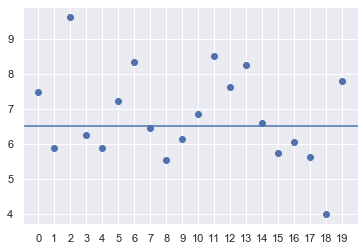

In [35]:
mean_gw_scores = []

threshold = 6.5

for user_ind in res['user_ind'].unique().tolist():
    single_u = res[res['user_ind']==user_ind]
    gw_mask = single_u['word'].apply(lambda x: x in all_gwords)
    gw_scores = single_u[gw_mask]['score']
    #print('user ind', user_ind, 'mean g word score', gw_scores.mean(), 'scores for ground words', gw_scores)
    mean_gw_scores.append(gw_scores.mean())
    if gw_scores.mean()<threshold:
        
        bad_users.append(user_ind)
plt.scatter(range(len(mean_gw_scores)), mean_gw_scores)
plt.axhline(threshold)
plt.xticks(np.arange(len(mean_gw_scores)))
plt.show()

#### all of the good ones in this case are above 7 as they should be for the ground words. 

In [36]:
mturk.loc[9, 'Random ID']

'18522'

## removing words where their prob is different with or without a space!
#### Should have fixed the encoding so that this will no longer be a problem going forwards

In [37]:
res.head()

,user_ind,q_ind,word,prob,score
0,0,0,event,2.130662e-03,6
1,0,0,things,7.781028e-04,8
2,0,0,bad,4.916115e-04,2
3,0,0,events,4.103564e-07,10
4,0,0,circumstances,5.090322e-04,10


In [38]:
mask = res['word']=='events'
res[mask]['prob']

3       4.103564e-07
5       9.782679e-01
108     4.103564e-07
110     9.782679e-01
213     4.103564e-07
215     9.782679e-01
318     4.103564e-07
320     9.782679e-01
423     4.103564e-07
425     9.782679e-01
528     4.103564e-07
530     9.782679e-01
633     4.103564e-07
635     9.782679e-01
738     4.103564e-07
740     9.782679e-01
843     4.103564e-07
845     9.782679e-01
948     4.103564e-07
950     9.782679e-01
1053    4.103564e-07
1055    9.782679e-01
1158    4.103564e-07
1160    9.782679e-01
1263    4.103564e-07
1265    9.782679e-01
1368    4.103564e-07
1370    9.782679e-01
1473    4.103564e-07
1475    9.782679e-01
1578    4.103564e-07
1580    9.782679e-01
1683    4.103564e-07
1685    9.782679e-01
1788    4.103564e-07
1790    9.782679e-01
1893    4.103564e-07
1895    9.782679e-01
1998    4.103564e-07
2000    9.782679e-01
Name: prob, dtype: float64

In [44]:
def gword_same_prob(x):
    #print(x.index)
    rows_to_drop = []
    dupe_mask = x['word'].duplicated(keep=False)
    dupe_words = x['word'][dupe_mask]
    #print(dupe_words)
    for w in dupe_words.unique().tolist():
        same_prob = len(x[x['word']==w]['prob'].unique().tolist())==1
        #print(x[x['word']==w]['score'])
        #print('same score', same_prob)
        if not same_prob: # removing ground truth words with a lower prob
            ind_mask = mask = x['word']==w
            # drop the smaller one
            smaller = np.argmin(x[ind_mask]['prob'])
            rows_to_drop.append( smaller )
            # np.arange(len(x['word']))
        else: # removing the first one to avoid double counting 
            ind_mask = mask = x['word']==w
            # drop the smaller one
            smaller = np.argmin(x[ind_mask].index)
            rows_to_drop.append( smaller )
            

            
    return rows_to_drop

res_rows_to_drop = res.groupby('q_ind').apply(gword_same_prob)
res_rows_to_drop #= res_rows_to_drop.ravel().flatten()



Int64Index([   3,    5,  108,  110,  213,  215,  318,  320,  423,  425,  528,
             530,  633,  635,  738,  740,  843,  845,  948,  950, 1053, 1055,
            1158, 1160, 1263, 1265, 1368, 1370, 1473, 1475, 1578, 1580, 1683,
            1685, 1788, 1790, 1893, 1895, 1998, 2000],
           dtype='int64')
Int64Index([   3,    5,  108,  110,  213,  215,  318,  320,  423,  425,  528,
             530,  633,  635,  738,  740,  843,  845,  948,  950, 1053, 1055,
            1158, 1160, 1263, 1265, 1368, 1370, 1473, 1475, 1578, 1580, 1683,
            1685, 1788, 1790, 1893, 1895, 1998, 2000],
           dtype='int64')
Int64Index([   8,    9,  113,  114,  218,  219,  323,  324,  428,  429,  533,
             534,  638,  639,  743,  744,  848,  849,  953,  954, 1058, 1059,
            1163, 1164, 1268, 1269, 1373, 1374, 1478, 1479, 1583, 1584, 1688,
            1689, 1793, 1794, 1898, 1899, 2003, 2004],
           dtype='int64')
Int64Index([  18,   20,  123,  125,  228,  230,  333,  

q_ind
0        [0, 0, 0, 3, 0, 0]
1        [0, 8, 0, 0, 0, 0]
2       [0, 0, 0, 0, 20, 0]
3       [24, 0, 0, 0, 0, 0]
4     [0, 0, 0, 0, 0, 0, 0]
5       [0, 40, 0, 0, 0, 0]
6     [0, 0, 0, 0, 0, 0, 0]
7     [0, 0, 0, 0, 0, 0, 0]
8       [0, 0, 59, 0, 0, 0]
9     [0, 0, 0, 0, 0, 0, 0]
10    [0, 0, 0, 0, 0, 0, 0]
11    [0, 0, 0, 0, 0, 0, 0]
12    [0, 0, 0, 0, 0, 0, 0]
13    [0, 0, 0, 0, 0, 0, 0]
14     [0, 101, 0, 0, 0, 0]
dtype: object

In [40]:
temp_rtod = []
for r in res_rows_to_drop:
    try:
        temp_rtod.append(r[0])
    except:
        pass
res_rows_to_drop = np.asarray(temp_rtod)
res_rows_to_drop

array([  3,   8,  20,  24,  40,  59, 101])

In [41]:
c_res = res.drop(res_rows_to_drop, axis=0,)

In [42]:
good_users = list(set(res['user_ind'].unique().tolist())-set(bad_users))
good_users

[2, 5, 6, 10, 11, 12, 13, 19]

In [43]:
len(good_users)

8

# Plots without the bad users

In [74]:
guser_mask = c_res['user_ind'].apply(lambda x: x in good_users)
guser = c_res[guser_mask]

In [75]:
guser.shape

(840, 5)

(0, 10.5)

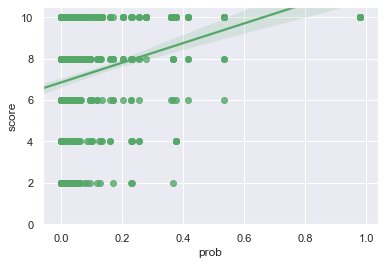

In [76]:
# put a linear regression through this. 



import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=guser['prob'], y=guser['score'], color="g")
plt.ylim([0,10.5])

In [77]:
guser.groupby('score').apply(lambda x: len(x))

score
2     143
4      71
6     108
8     181
10    337
dtype: int64

In [78]:
means = guser.groupby('score').mean()['prob']
errors = (1.96*(guser.groupby('score').std()['prob']/np.sqrt(guser.groupby('score').apply(lambda x:len(x)) )))

errors

score
2     0.007780
4     0.023672
6     0.018099
8     0.014416
10    0.018713
dtype: float64

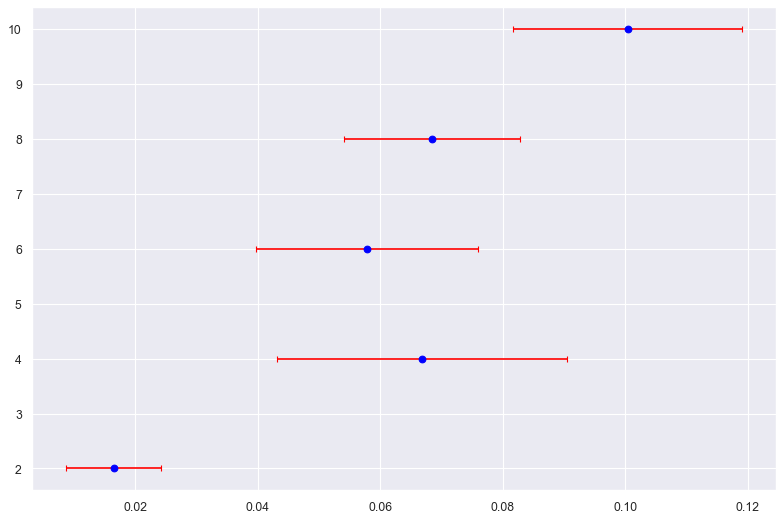

Text(0, 0.5, 'Score')

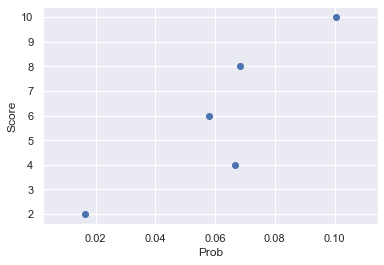

In [79]:
x_pos = means #np.arange(len(means))
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar(x_pos, means.index, xerr=errors, ecolor='red', fmt='o', capsize=3, color = 'blue')
plt.show()
plt.scatter(means, means.index)
plt.xlabel('Prob')
plt.ylabel('Score')

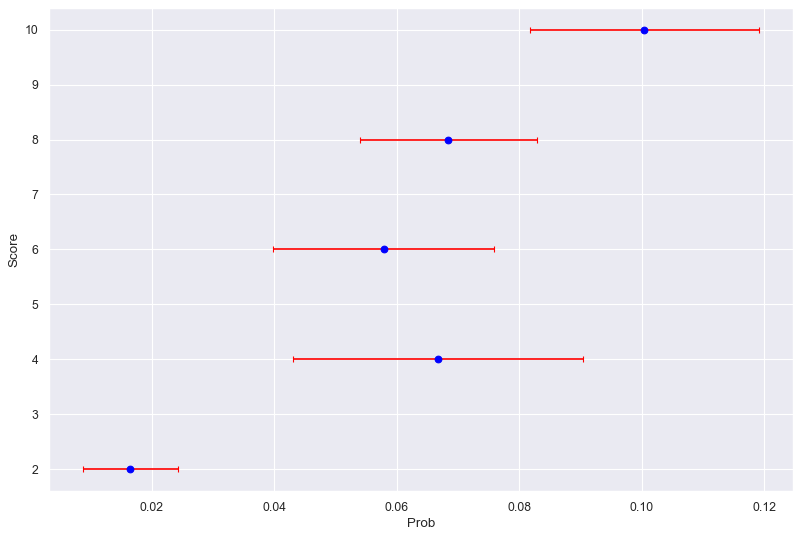

In [80]:
x_pos = means #np.arange(len(means))
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar(x_pos, means.index, xerr=errors, ecolor='red', fmt='o', capsize=3, color = 'blue')
plt.xlabel('Prob')
plt.ylabel('Score')
plt.show()
#plt.scatter(means, means.index)
